In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv("C:\\Users\\HOME\\Downloads\\healthcare-dataset-stroke-data.csv")


if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

In [16]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [18]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.shape

(5110, 11)

In [ ]:
#unique values in categorical columns

cat_cols = df.select_dtypes(include="object").columns

print("=== Unique values for each categorical column ===\n")
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")
    print("-" * 50)

=== Unique values for each categorical column ===

gender: ['Male' 'Female' 'Other']
--------------------------------------------------
ever_married: ['Yes' 'No']
--------------------------------------------------
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
--------------------------------------------------
Residence_type: ['Urban' 'Rural']
--------------------------------------------------
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
--------------------------------------------------


In [ ]:
# missing values
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
###EDA

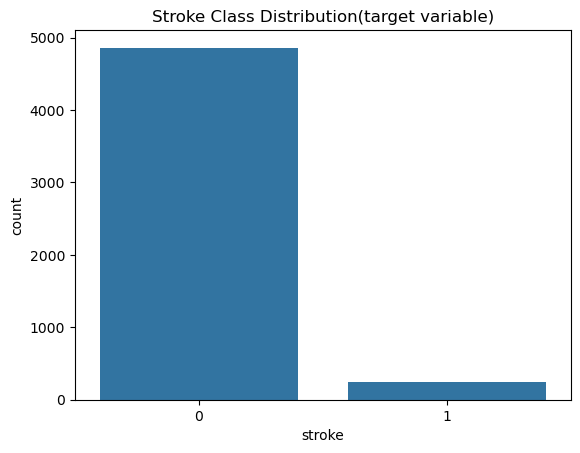

In [ ]:

# Countplot: Target distribution
sns.countplot(x='stroke', data=df)
plt.title("Stroke Class Distribution(target variable)")
plt.show()

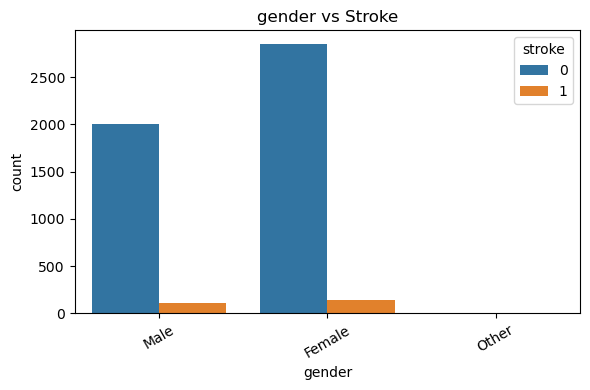

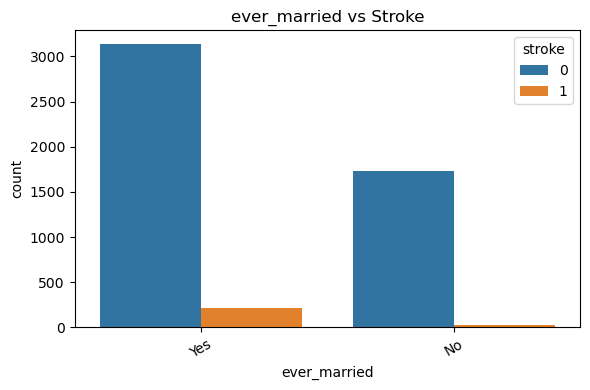

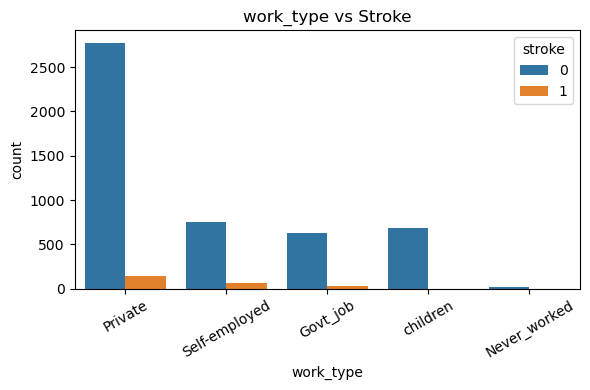

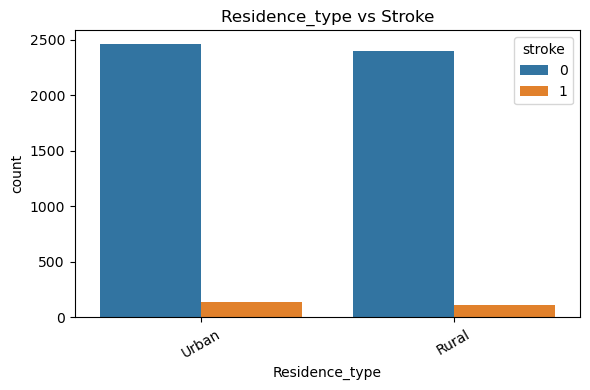

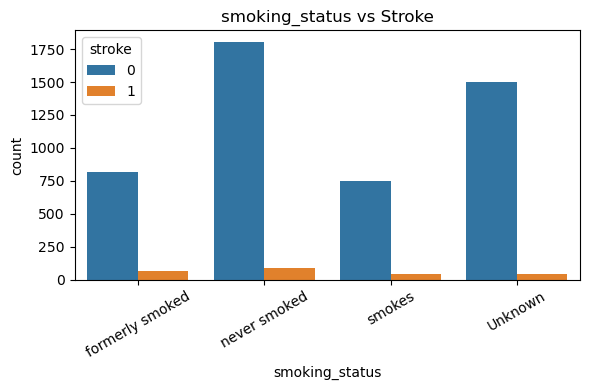

In [22]:
# Countplots for categorical columns: Categorical vs Target
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='stroke')
    plt.title(f"{col} vs Stroke")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

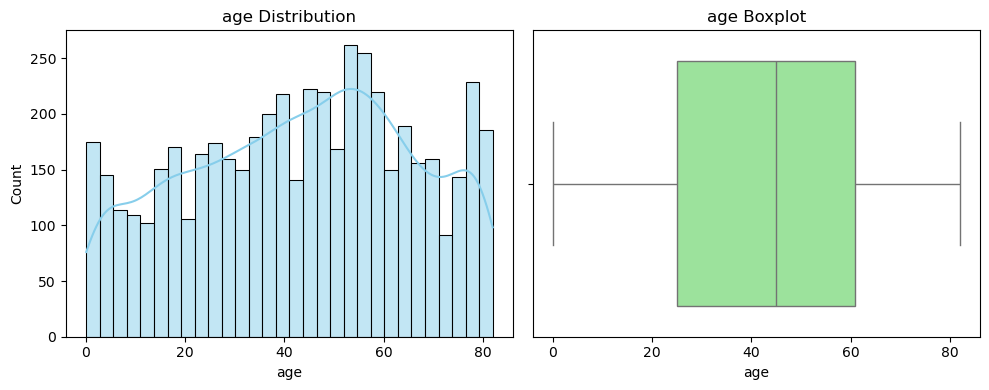

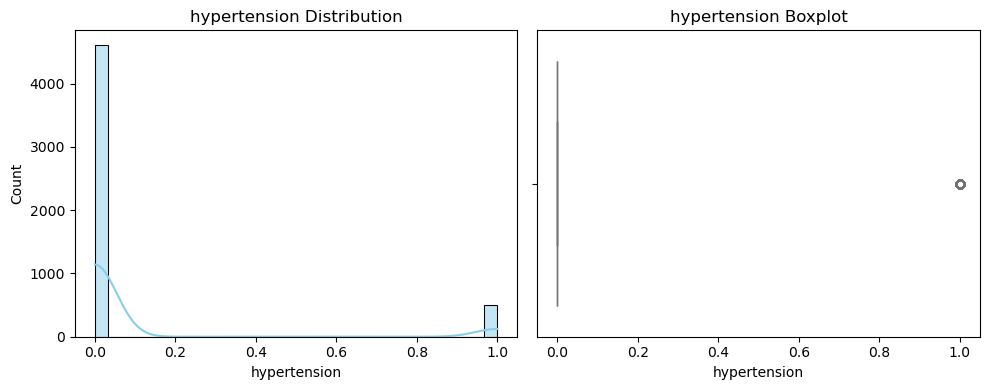

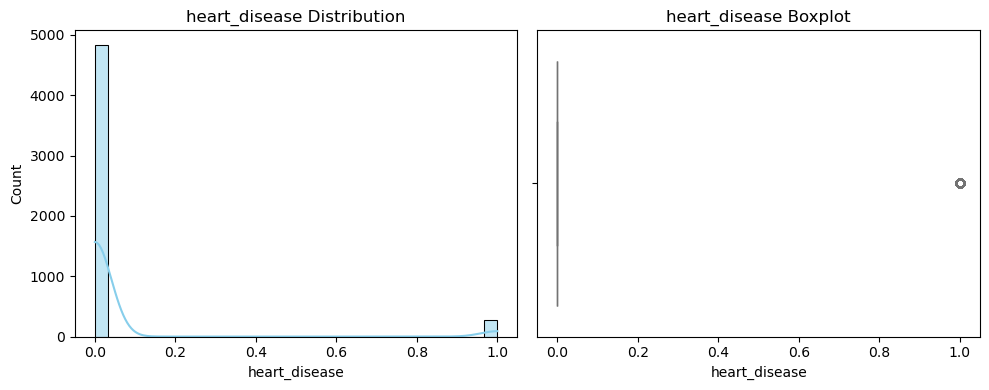

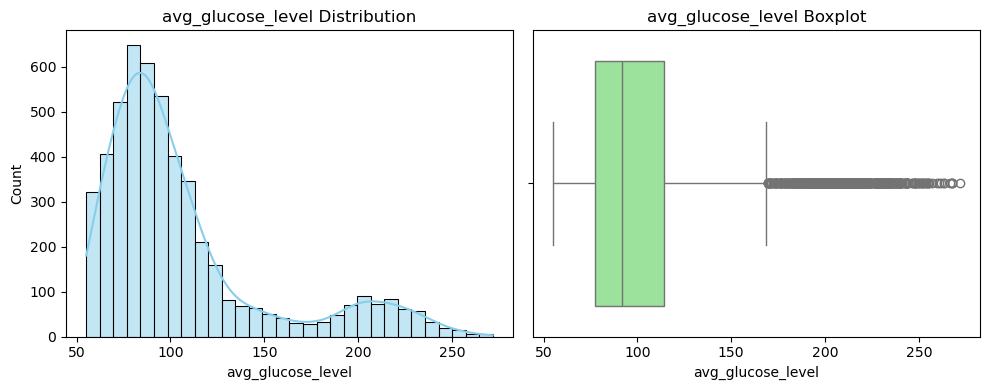

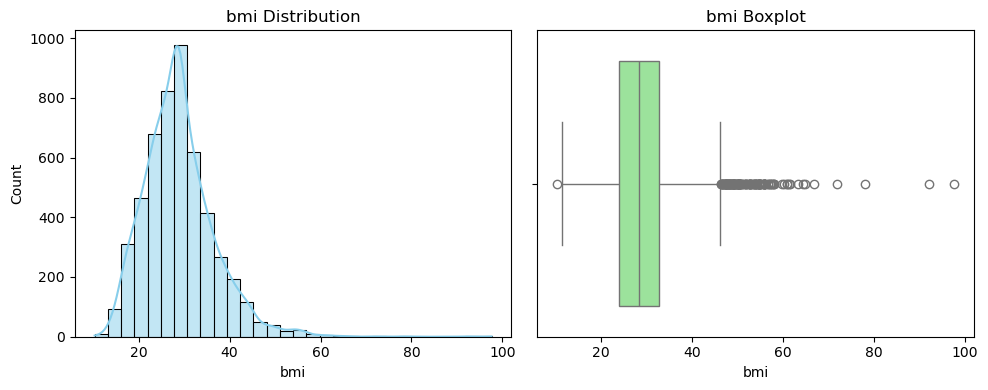

In [27]:
# Histograms: Numeric columns
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"{col} Distribution")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"{col} Boxplot")

    plt.tight_layout()
    plt.show()

In [24]:
# encoding categorical features
df_encoded = df.copy()
encoder = OrdinalEncoder()
df_encoded[categorical_cols] = encoder.fit_transform(df[categorical_cols])

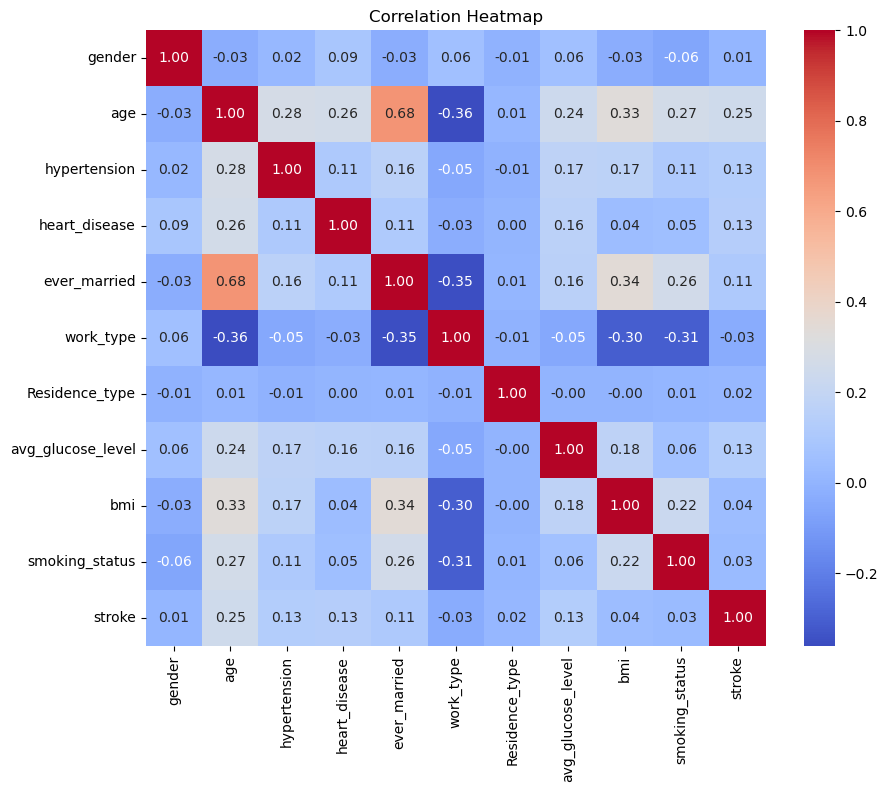

In [25]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [26]:
#data preprocessing 
##handling missing values
mice_imputer = IterativeImputer(random_state=42)
df[['bmi']] = mice_imputer.fit_transform(df[['bmi']])

In [29]:
##removing outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ['age', 'avg_glucose_level', 'bmi']:
    df = remove_outliers_iqr(df, col)

print("\nAfter outlier removal shape of the dataset:", df.shape)


After outlier removal shape of the dataset: (4244, 11)


In [30]:
# 5. Encode categorical features

cat_cols = df.select_dtypes(include='object').columns
encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols])

In [31]:
#splitting the data
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
#using smote to remove imbalance 
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("\nAfter SMOTE:")
print("Train shape:", X_train.shape)
print("Class distribution:\n", y_train.value_counts())


After SMOTE:
Train shape: (6538, 10)
Class distribution:
 stroke
0    3269
1    3269
Name: count, dtype: int64



Top 10 Important Features:
age: 0.3509
smoking_status: 0.1388
bmi: 0.1333
avg_glucose_level: 0.1084
work_type: 0.1074
ever_married: 0.0743
Residence_type: 0.0312
gender: 0.0256
hypertension: 0.0153
heart_disease: 0.0149


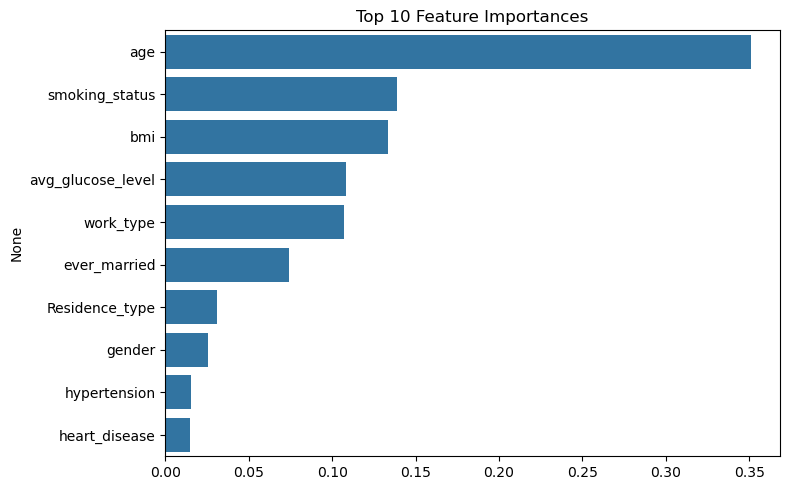

In [41]:
#feature importance
feature_names = df.drop('stroke', axis=1).columns
importances = rf.feature_importances_
top_idx = importances.argsort()[::-1][:10]

print("\nTop 10 Important Features:")
for i in top_idx:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[top_idx], y=feature_names[top_idx])
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

In [34]:
#training with an ml model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [35]:
#evaluation of the model
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

In [36]:
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))


=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9647    0.9682    0.9664       818
           1     0.0714    0.0645    0.0678        31

    accuracy                         0.9352       849
   macro avg     0.5181    0.5164    0.5171       849
weighted avg     0.9321    0.9352    0.9336       849



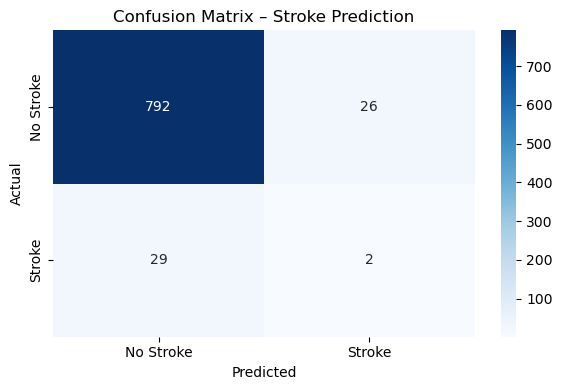

In [37]:

#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No Stroke', 'Stroke']

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Stroke Prediction')
plt.tight_layout()
plt.show()


In [38]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

Accuracy: 0.9352
ROC-AUC: 0.7953


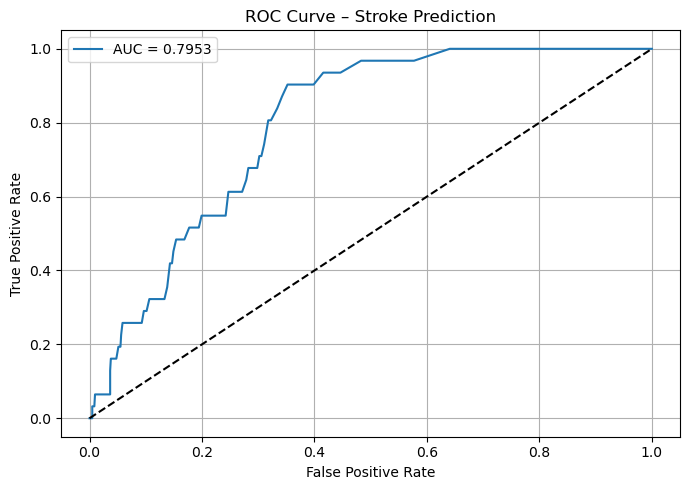

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Stroke Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()